# <center><mark>TASK 2</mark><center>

## Create a K map clustering algorithm to group customers of retail stored based on their purchase history

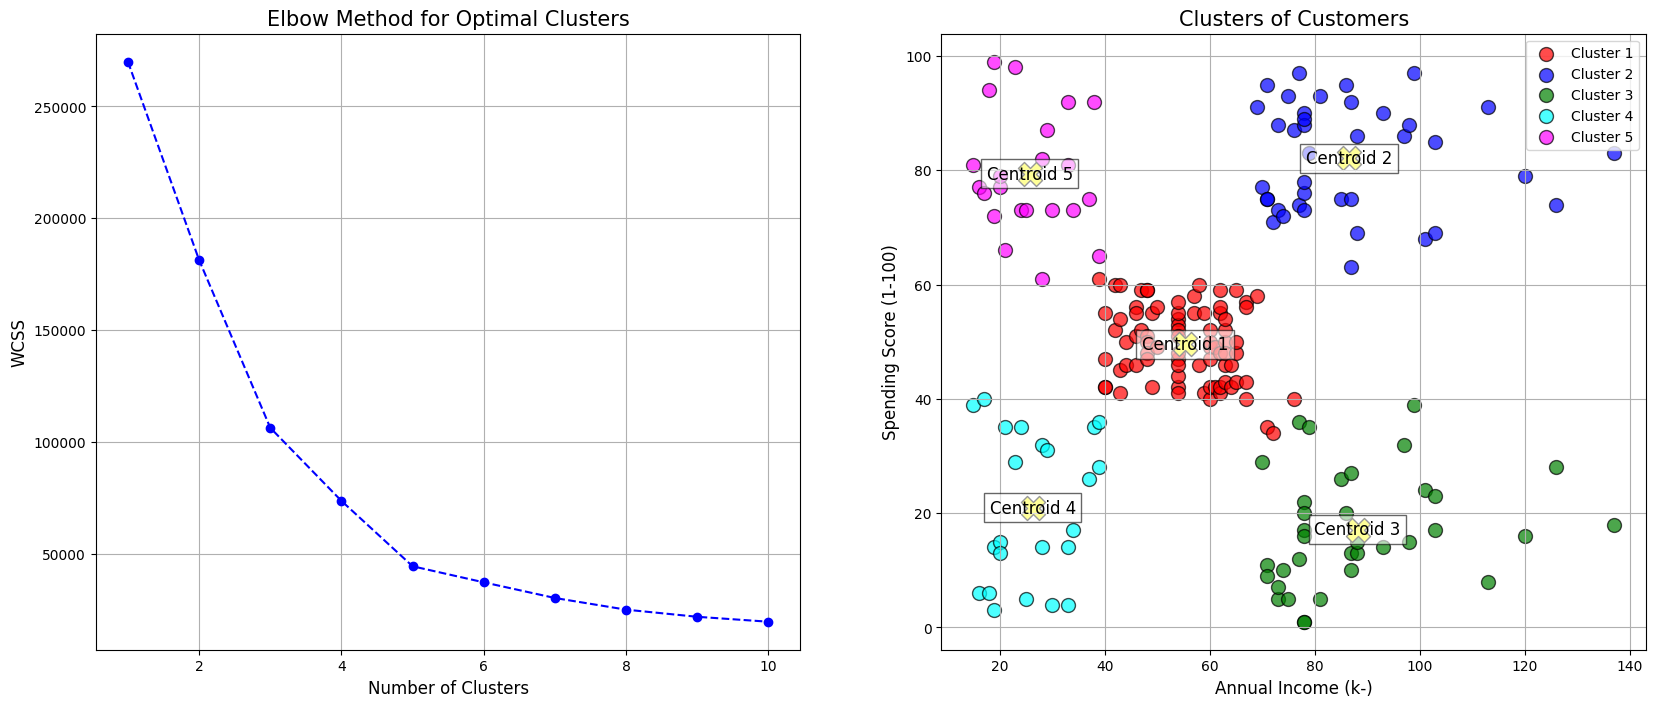

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
file_path = 'Mall_Customers.csv'
df = pd.read_csv(file_path)

# Selecting the features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the Elbow method
wcss = []  # List to store the WCSS for each number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)  # Fit the KMeans model
    wcss.append(kmeans.inertia_)  # Append the WCSS to the list

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot the Elbow graph
axs[0].plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
axs[0].set_title('Elbow Method for Optimal Clusters', fontsize=15)
axs[0].set_xlabel('Number of Clusters', fontsize=12)
axs[0].set_ylabel('WCSS', fontsize=12)
axs[0].grid(True)

# Applying K-Means with the chosen number of clusters (5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)  # Fit the model and predict the cluster for each data point

# Adding the cluster results to the original dataframe
df['Cluster'] = y_kmeans

# Plot the clusters
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    axs[1].scatter(X.iloc[y_kmeans == i, 0], X.iloc[y_kmeans == i, 1], 
                   s=100, c=colors[i], label=f'Cluster {i+1}', edgecolors='black', alpha=0.7)
    axs[1].scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], 
                   s=300, c='yellow', edgecolors='black', marker='X')
    axs[1].text(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], 
                f'Centroid {i+1}', fontsize=12, ha='center', va='center', 
                bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

# Add titles and labels
axs[1].set_title('Clusters of Customers', fontsize=15)
axs[1].set_xlabel('Annual Income (k-)', fontsize=12)
axs[1].set_ylabel('Spending Score (1-100)', fontsize=12)
axs[1].legend()
axs[1].grid(True)

# Display the plots
plt.show()

# <center><mark>Thankyou</mark></center>